## k-means Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [83]:
ba_volatility = pd.read_csv('../Inertia Trading/ba_weekly_return_volatility.csv')
ba_detailed = pd.read_csv("../Inertia Trading/ba_weekly_return_detailed.csv")

labels = ba_detailed[['Year','Week_Number', 'label']].drop_duplicates()

ba_volatility = ba_volatility.merge(
    labels, 
    on=['Year','Week_Number'], 
    how='inner'
)
ba_volatility.head()

,Year,Week_Number,mean_return,volatility,label
0,2020,0,-0.08400,0.118794,green
1,2020,1,-0.16120,1.584772,green
2,2020,2,-0.34560,1.269723,green
3,2020,3,-0.05525,2.818341,green
4,2020,4,-0.28880,1.510424,green


In [84]:
yr1 = ba_volatility[ba_volatility['Year'] < 2023]
yr2 = ba_volatility[ba_volatility['Year'] >= 2023]

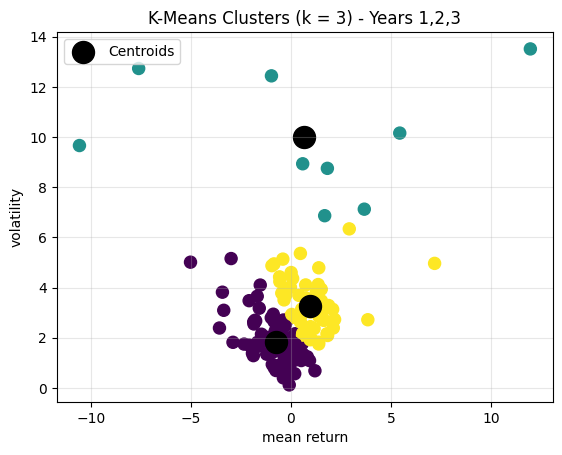

In [ ]:
features = ['mean_return', 'volatility']
x = yr1[features].values
kmeans_clust = KMeans(n_clusters=3, random_state=79)
y_means = kmeans_clust.fit_predict(x)
centroids = kmeans_clust.cluster_centers_
# centroids

fig, ax = plt.subplots(1,figsize=(7,5))
plt.scatter(x[:, 0], x[:, 1], c=y_means, s=75)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=250, c='black', label='Centroids'
)

plt.xlabel("mean return")
plt.ylabel("volatility")
plt.title("K-Means Clusters (k = 3) - Years 1,2,3")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


/var/folders/nc/5dc3_9y52yv6qhckcby4v4dc0000gn/T/ipykernel_41249/4120038400.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


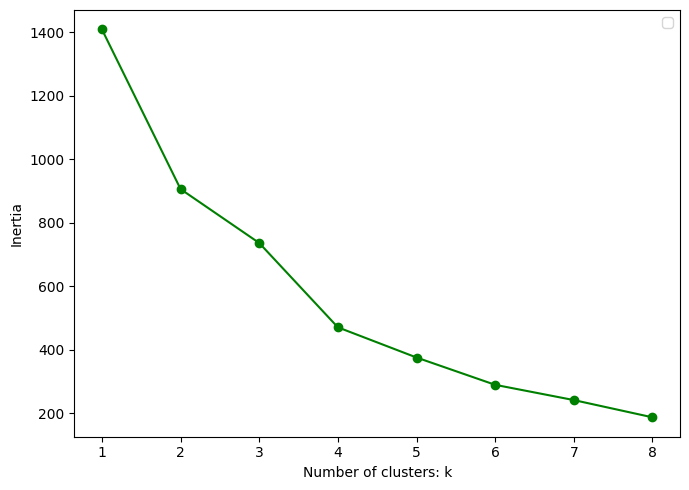

In [86]:
inertia_list = []
k_values = range(1,9)
x = yr1[features].values
for k in k_values:
    kmeans_clust = KMeans(n_clusters=k, random_state=79)
    y_means = kmeans_clust.fit_predict(x)
    inertia = kmeans_clust.inertia_
    inertia_list.append(inertia)
    
fig, ax = plt.subplots(1,figsize=(7,5))
plt.plot(k_values, inertia_list, marker='o', color='green')
plt.legend()
plt.xlabel('Number of clusters: k')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

/var/folders/nc/5dc3_9y52yv6qhckcby4v4dc0000gn/T/ipykernel_41249/2314434153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr1['cluster'] = kmeans_clust.fit_predict(x)


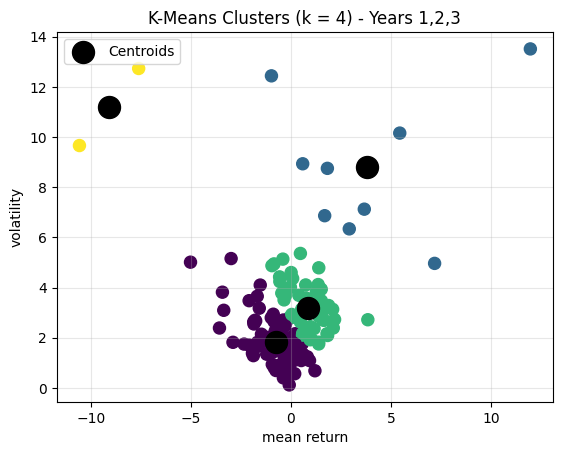

In [ ]:
features = ['mean_return', 'volatility']
x = yr1[features].values
kmeans_clust = KMeans(n_clusters=4, random_state=79)
yr1['cluster'] = kmeans_clust.fit_predict(x)
centroids = kmeans_clust.cluster_centers_
centroids

fig, ax = plt.subplots(1,figsize=(7,5))
plt.scatter(x[:, 0], x[:, 1], c=yr1['cluster'], s=75)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=250, c='black', label='Centroids'
)
plt.xlabel("mean return")
plt.ylabel("volatility")
plt.title("K-Means Clusters (k = 4) - Years 1,2,3")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [88]:
yr1.head()

,Year,Week_Number,mean_return,volatility,label,cluster
0,2020,0,-0.08400,0.118794,green,0
1,2020,1,-0.16120,1.584772,green,0
2,2020,2,-0.34560,1.269723,green,0
3,2020,3,-0.05525,2.818341,green,2
4,2020,4,-0.28880,1.510424,green,0


In [ ]:
cluster_summary = (
    yr1.groupby('cluster')['label']
       .value_counts(normalize=True)
       .rename("percentage")
       .mul(100)
       .reset_index()
)
cluster_summary.pivot(index='cluster', columns='label', values='percentage').fillna(0)

label,green,red
cluster,,
0,67.441860,32.558140
1,88.888889,11.111111
2,96.666667,3.333333
3,0.000000,100.000000


/var/folders/nc/5dc3_9y52yv6qhckcby4v4dc0000gn/T/ipykernel_41249/3230757812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr2['cluster'] = kmeans_clust.fit_predict(x2)


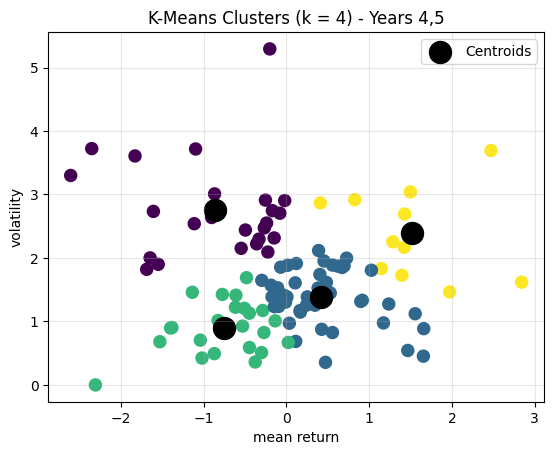

In [90]:
x2 = yr2[features].values
kmeans_clust = KMeans(n_clusters=4, random_state=79)
yr2['cluster'] = kmeans_clust.fit_predict(x2)
centroids = kmeans_clust.cluster_centers_
centroids
plt.scatter(x2[:, 0], x2[:, 1], c=yr2['cluster'], s=75)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=250, c='black', label='Centroids'
)
plt.xlabel("mean return")
plt.ylabel("volatility")
plt.title("K-Means Clusters (k = 4) - Years 4,5")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [98]:
cluster_summary = (
    yr2.groupby('cluster')['label']
       .value_counts(normalize=True)
       .rename("percentage")
       .mul(100)
       .reset_index()
)
cluster_summary.pivot(index='cluster', columns='label', values='percentage').fillna(0)

label,green,red
cluster,,
0,62.500000,37.500000
1,100.000000,0.000000
2,69.565217,30.434783
3,100.000000,0.000000
